In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


['measurement', 'station']

In [6]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


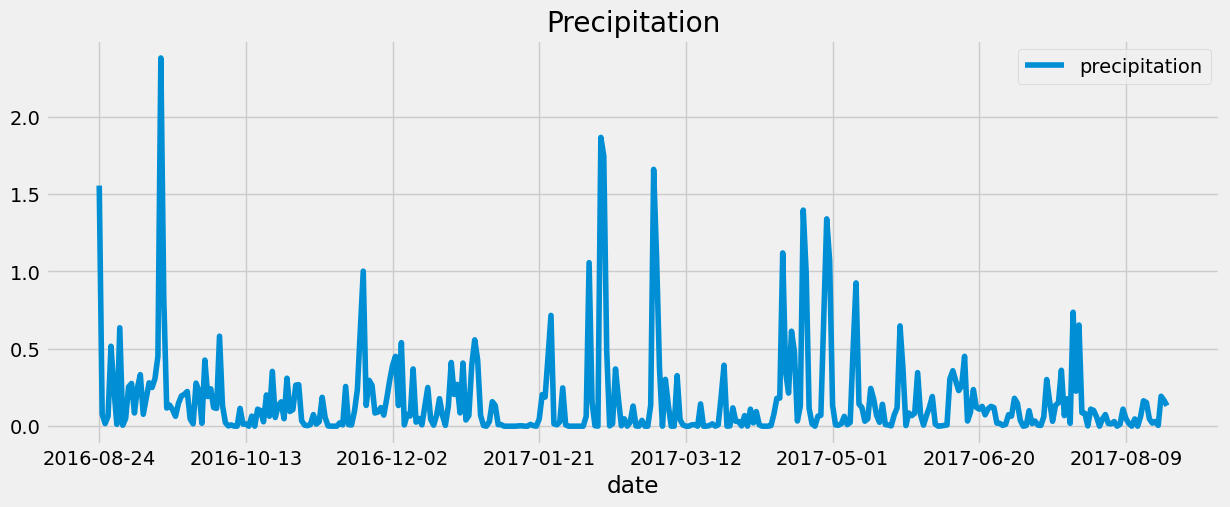

,date,precipitation
0,2016-08-24,1.555000
1,2016-08-25,0.077143
2,2016-08-26,0.016667
3,2016-08-27,0.064000
4,2016-08-28,0.516667


<Figure size 640x480 with 0 Axes>

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_year_precip = session.query(measurement.date).\
    filter(measurement.date > last_year).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
results = session.query(measurement.date, func.avg(measurement.prcp)).\
      filter(measurement.date < "2017-08-24").\
      filter(measurement.date > "2016-08-23").\
        order_by(measurement.date).\
        group_by(measurement.date).\
        all()


# Sort the dataframe by date
precip_df = pd.DataFrame(results, columns = ["date", "precipitation"])
precip_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(x= 'date', y='precipitation', figsize=(13.5,5))
plt.title("Precipitation")

plt.show()
plt.tight_layout()

precip_df.head()

In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_full_results = session.query(measurement.date, measurement.prcp)
precip_full_df = pd.DataFrame(precip_full_results, columns=['date','prcp'])
precip_full_df.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station.station).distinct().count()
print(total_stations)

9


In [48]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
most_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [53]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = most_stations[0][0]

min_max_avg = [func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]

session.query(*min_max_avg).all()

[(53.0, 87.0, 73.09795396419437)]

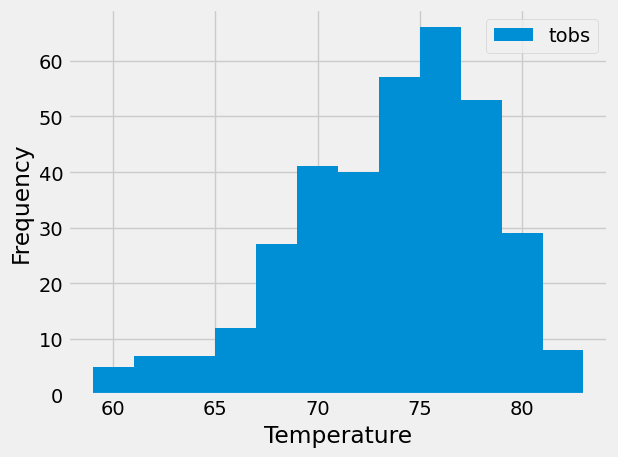

In [60]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temp_data = session.query(measurement.date, measurement.tobs).\
                        filter(measurement.station == 'USC00519281').\
                        filter(measurement.date >= last_year).all()

year_temp_df = pd.DataFrame(year_temp_data, columns=['Date','tobs'])

year_temp_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.tight_layout()

# Close Session

In [61]:
# Close Session
session.close()